In [17]:
import pandas as pd
import numpy as np
import re
import string
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
data = pd.read_csv('data/Suicide_Detection.csv')

print(data.head())
print(data.info())

print(data['class'].value_counts())


   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
None
class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


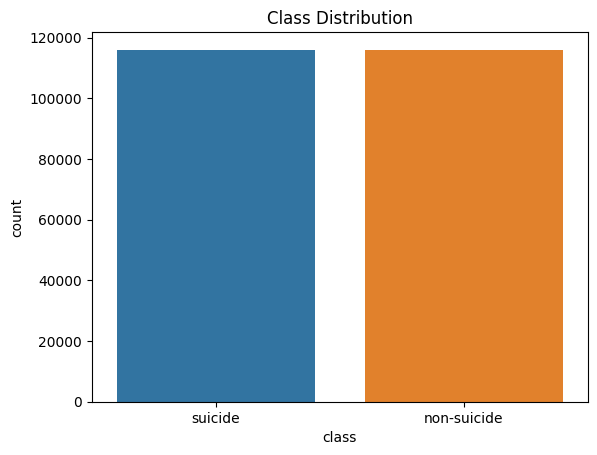

In [19]:
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(clean_text)
print(data[['text', 'clean_text']].head())

                                                text  \
0  Ex Wife Threatening SuicideRecently I left my ...   
1  Am I weird I don't get affected by compliments...   
2  Finally 2020 is almost over... So I can never ...   
3          i need helpjust help me im crying so hard   
4  I’m so lostHello, my name is Adam (16) and I’v...   

                                          clean_text  
0  ex wife threatening suiciderecently left wife ...  
1  weird dont get affected compliment coming some...  
2  finally almost never hear bad year ever swear ...  
3                     need helpjust help im cry hard  
4  im losthello name adam ive struggling year im ...  


In [26]:
data['label'] = data['class'].map({'suicide': 1, 'non-suicide': 0})

X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9332974254012711

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     23208
           1       0.94      0.92      0.93     23207

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



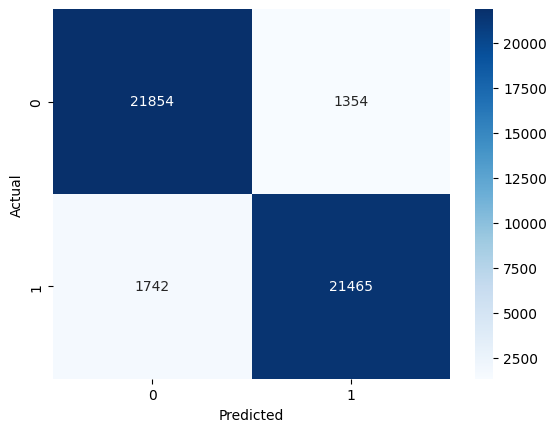

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
joblib.dump(model, 'suicide_detection_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']